Предварительная обработка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

file_path = 'SMSSpamCollection.csv'  
data = pd.read_csv(file_path, sep='\t', header=None, names=['Label', 'Message'])

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])

X = data['Message']
y = data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

Построение моделей

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_vec, y_train)

nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_vec, y_train)

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_vec, y_train)

GradientBoostingClassifier(random_state=42)

Оценка качества моделей

In [18]:
from sklearn.metrics import classification_report, accuracy_score

models = {
    'Logistic Regression': lr_model,
    'Naive Bayes': nb_model,
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model
}

for name, model in models.items():
    print(f"--- {name} ---")
    y_pred = model.predict(X_test_vec)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    print("\n")

--- Logistic Regression ---
Accuracy: 0.9758
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       966
        spam       0.99      0.83      0.90       149

    accuracy                           0.98      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115



--- Naive Bayes ---
Accuracy: 0.9848
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       966
        spam       0.96      0.92      0.94       149

    accuracy                           0.98      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.98      0.98      0.98      1115



--- Random Forest ---
Accuracy: 0.9749
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       966
        spam       1.00      0.81      0.90       149

    accuracy                           0.97      1115
   

Матрица ошибок и примеры

--- Logistic Regression ---


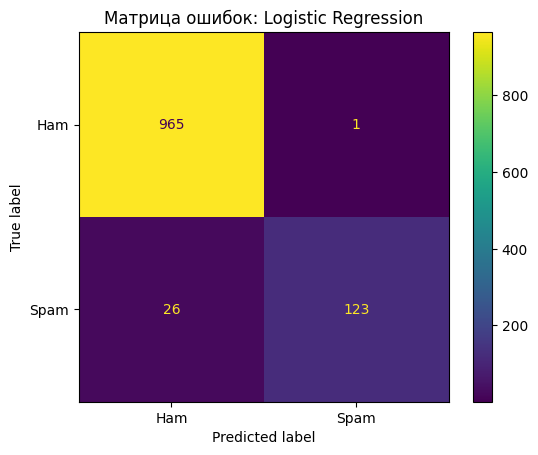


Всего ошибкок: 27

Сообщение: FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
Должно быть: Spam, Предсказано: Ham

Сообщение: I'm always on yahoo messenger now. Just send the message to me and i.ll get it you may have to send it in the mobile mode sha but i.ll get it. And will reply.
Должно быть: Ham, Предсказано: Spam

Сообщение: Dear Voucher Holder 2 claim your 1st class airport lounge passes when using Your holiday voucher call 08704439680. When booking quote 1st class x 2
Должно быть: Spam, Предсказано: Ham

--- Naive Bayes ---


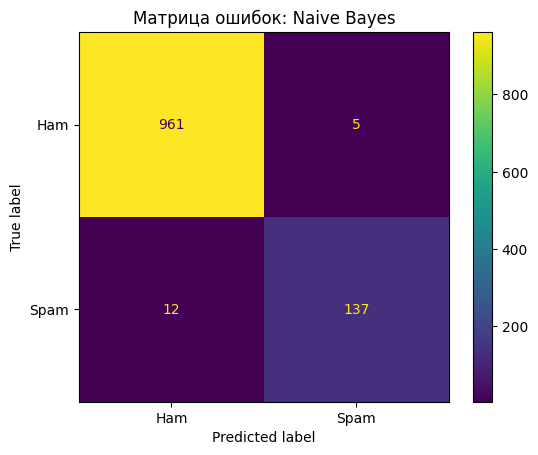


Всего ошибкок: 17

Сообщение: ringtoneking 84484
Должно быть: Spam, Предсказано: Ham

Сообщение: Sorry I missed your call let's talk when you have the time. I'm on 07090201529
Должно быть: Spam, Предсказано: Ham

Сообщение: Latest News! Police station toilet stolen, cops have nothing to go on!
Должно быть: Spam, Предсказано: Ham

--- Random Forest ---


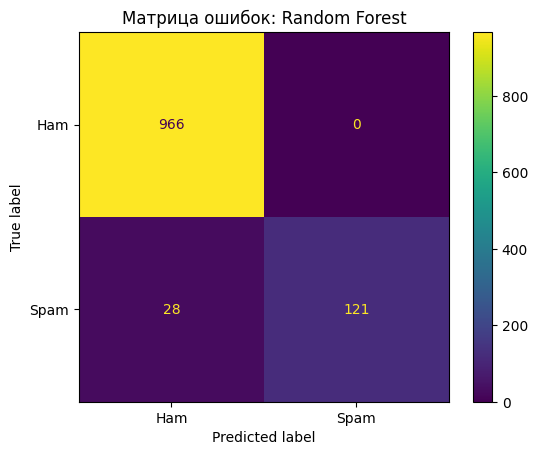


Всего ошибкок: 28

Сообщение: FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
Должно быть: Spam, Предсказано: Ham

Сообщение: Hi if ur lookin 4 saucy daytime fun wiv busty married woman Am free all next week Chat now 2 sort time 09099726429 JANINExx Calls£1/minMobsmoreLKPOBOX177HP51FL
Должно быть: Spam, Предсказано: Ham

Сообщение: ringtoneking 84484
Должно быть: Spam, Предсказано: Ham

--- Gradient Boosting ---


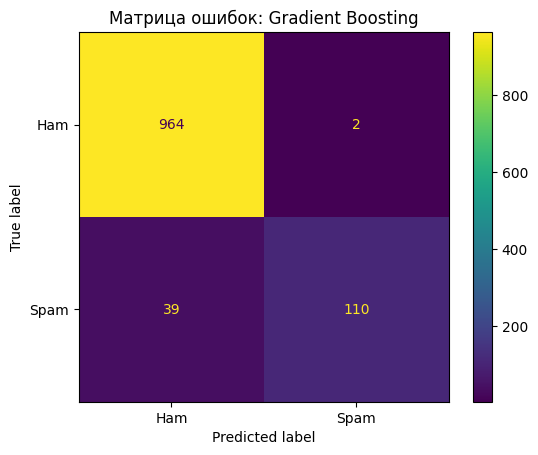


Всего ошибкок: 41

Сообщение: FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
Должно быть: Spam, Предсказано: Ham

Сообщение: I'm always on yahoo messenger now. Just send the message to me and i.ll get it you may have to send it in the mobile mode sha but i.ll get it. And will reply.
Должно быть: Ham, Предсказано: Spam

Сообщение: Dear Voucher Holder 2 claim your 1st class airport lounge passes when using Your holiday voucher call 08704439680. When booking quote 1st class x 2
Должно быть: Spam, Предсказано: Ham



In [23]:
def show_misclassified_examples(model, X_test_vec, y_test, X_test):
    """
    Show examples of misclassified messages for a given model.
    """
    y_pred = model.predict(X_test_vec)
    misclassified_indices = np.where(y_test != y_pred)[0]

    print(f"\nВсего ошибкок: {len(misclassified_indices)}\n")
    for idx in misclassified_indices[:3]:
        true_label = "Spam" if y_test.iloc[idx] == 1 else "Ham"
        predicted_label = "Spam" if y_pred[idx] == 1 else "Ham"
        print(f"Сообщение: {X_test.iloc[idx]}")
        print(f"Должно быть: {true_label}, Предсказано: {predicted_label}\n")


for name, model in models.items():
    print(f"--- {name} ---")
    y_pred = model.predict(X_test_vec)
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Ham", "Spam"])
    disp.plot(cmap="viridis")
    plt.title(f"Матрица ошибок: {name}")
    plt.show()

    show_misclassified_examples(model, X_test_vec, y_test, X_test)

Анализ данных

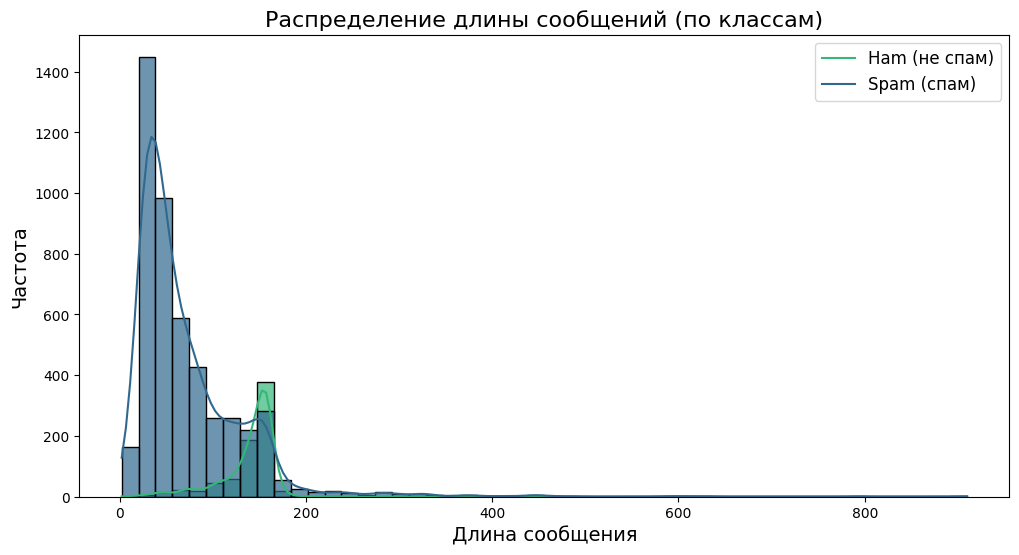

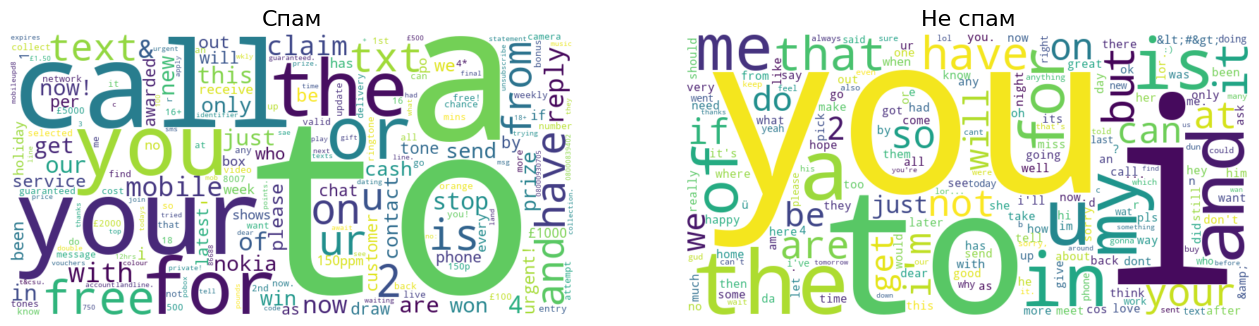

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud


data['MessageLength'] = data['Message'].apply(len)


plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='MessageLength', hue='Label', bins=50, kde=True, palette='viridis', alpha=0.7)
plt.title('Распределение длины сообщений (по классам)', fontsize=16)
plt.xlabel('Длина сообщения', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.legend(['Ham (не спам)', 'Spam (спам)'], fontsize=12)
plt.show()

spam_messages = data[data['Label'] == 1]['Message']
ham_messages = data[data['Label'] == 0]['Message']

def get_word_frequencies(messages):
    all_words = ' '.join(messages).lower().split()
    return Counter(all_words)

spam_word_freq = get_word_frequencies(spam_messages)
ham_word_freq = get_word_frequencies(ham_messages)

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(spam_word_freq)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Спам', fontsize=16)

plt.subplot(1, 2, 2)
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(ham_word_freq)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Не спам', fontsize=16)

plt.show()